In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def collect_similarity_data(folder_path, file_prefix, metric="mean"):
    records = []
    draw_threshold_ls = [80, 85] + list(range(92, 100))
    for i in draw_threshold_ls:
        for file in Path(folder_path).glob(f"{file_prefix}*cdhit{i}.csv"):
            print(f"Processing {file}")
            df = pd.read_csv(file)
            for value in df[metric]:
                records.append({"Threshold": i, metric.capitalize(): value})
    return pd.DataFrame(records)

In [3]:
def plot_similarity_boxplot(df, metric="mean", output_path="analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/plot/boxplot_similarity_horizontal.png"):
    plt.figure(figsize=(5, 4))

    # 设置 Threshold 顺序：从 99 到 90（从上到下）
    ordered_thresholds = list(range(99, 91, -1)) + [85, 80]
    df["Threshold"] = pd.Categorical(df["Threshold"], categories=ordered_thresholds, ordered=True)

    # 横向 boxplot：y 是分类变量，x 是相似度
    sns.boxplot(data=df, x="Threshold", y=metric.capitalize(), fliersize=0, width=0.4)

    plt.title(f"Intra-cluster BGC {metric} similarity across CD-HIT thresholds")
    plt.ylabel(f"{metric.capitalize()} Cosine Similarity")
    plt.xlabel("CD-HIT Clustering Threshold (%)")
    plt.tight_layout()
    # plt.savefig(output_path, dpi=300)
    plt.show()

Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit80.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit85.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit92.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit93.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit94.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit95.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit96.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit97.csv
Processi

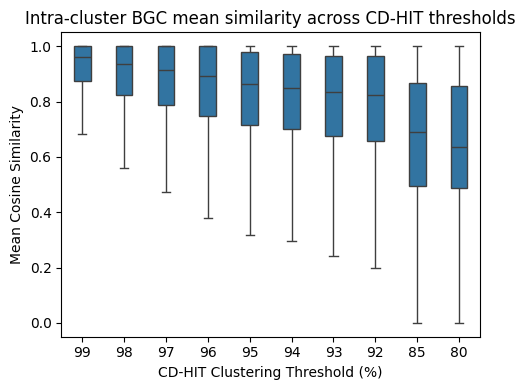

In [4]:
folder = "analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results"
metric = "mean"  # or "median", "std", etc.
sim_df = collect_similarity_data(folder, file_prefix="mean_int", metric=metric)
plot_similarity_boxplot(sim_df, metric=metric)

In [5]:
def collect_std_data(folder_path, file_prefix):
    records = []
    draw_threshold_ls = [80, 85] + list(range(92, 100))
    for i in draw_threshold_ls:
        for file in Path(folder_path).glob(f"{file_prefix}*cdhit{i}.csv"):
            df = pd.read_csv(file)
            for value in df["std"]:
                records.append({"Threshold": i, "Std": value})
    return pd.DataFrame(records)


In [6]:
def plot_std_boxplot(df, output_path="analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/plot/std_distribution_boxplot.png"):
    plt.figure(figsize=(5, 4))
    
    # 设置 Threshold 顺序从 99 到 90
    df["Threshold"] = pd.Categorical(df["Threshold"], categories=list(range(99, 91, -1)) + [85, 80], ordered=True)
    
    # Boxplot
    sns.boxplot(data=df, x="Threshold", y="Std", color="lightblue", width=0.4, fliersize=0)
    
    plt.title("Intra-cluster BGC Cosine Similarity Std across CD-HIT thresholds")
    plt.ylabel("Standard Deviation of Cosine Similarity")
    plt.xlabel("CD-HIT Clustering Threshold (%)")
    plt.tight_layout()
    # plt.savefig(output_path, dpi=300)
    plt.show()


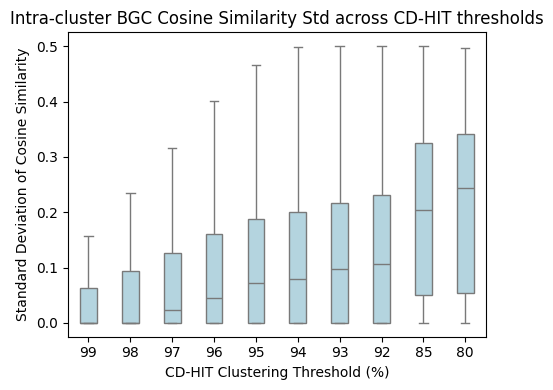

In [7]:
folder = "analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results"
std_df = collect_std_data(folder, file_prefix="mean_int")
plot_std_boxplot(std_df)


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

def plot_combined_boxplots(df_similarity, df_std, metric="mean",
                           output_path="analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/plot/Fig3D.png"):
    plt.rcParams.update({'font.size': 16})
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    # 绘制相似度箱线图
    ordered_thresholds = list(range(99, 91, -1)) + [85, 80]
    df_similarity["Threshold"] = pd.Categorical(df_similarity["Threshold"],
                                                categories=ordered_thresholds,
                                                ordered=True)
    sns.boxplot(data=df_similarity, x="Threshold", y=metric.capitalize(),
                fliersize=0, width=0.4, ax=axes[0])
    # axes[0].set_title(f"Intra - cluster BGC {metric} similarity across CD - HIT thresholds")
    axes[0].set_ylabel(f"{metric.capitalize()}")
    axes[0].set_xlabel("CD-HIT threshold (%)")

    # 绘制标准差箱线图
    df_std["Threshold"] = pd.Categorical(df_std["Threshold"],
                                         categories=ordered_thresholds,
                                         ordered=True)
    sns.boxplot(data=df_std, x="Threshold", y="Std", color="lightblue",
                width=0.4, fliersize=0, ax=axes[1])
    # axes[1].set_title("Intra - cluster BGC Cosine Similarity Std across CD - HIT thresholds")
    axes[1].set_ylabel("Std")
    axes[1].set_xlabel("CD-HIT threshold (%)")

    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()


Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit80.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit85.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit92.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit93.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit94.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit95.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit96.csv
Processing analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results/mean_int_bgc_count_cdhit97.csv
Processi

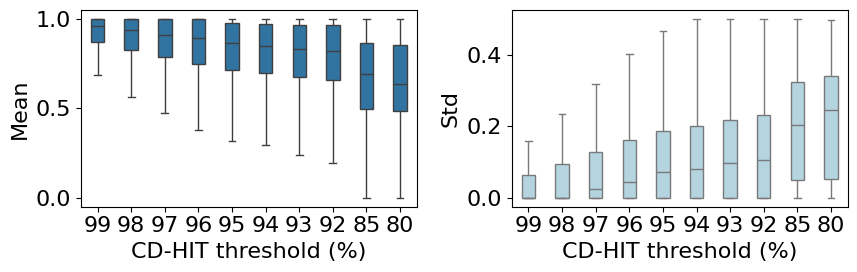

In [9]:
folder = "analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/BGC_similarity_results"
sim_df = collect_similarity_data(folder, file_prefix="mean_int", metric="mean")
std_df = collect_std_data(folder, file_prefix="mean_int")
plot_combined_boxplots(sim_df, std_df)
